<a href="https://colab.research.google.com/github/kokchun/Python-course-AI22/blob/main/Exercises/E10-numpy.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# Numpy exercises

---
These are introductory exercises in Python with focus in **Numpy**.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

<details>

<summary>Answer </summary>

a)
```
3.5
```

b) 

<img src="../Assets/numpy_1b.png" width = 300>

</details>




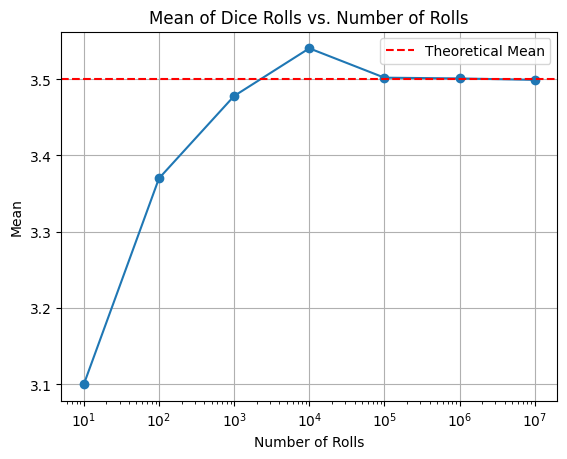

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of sides on the dice
num_sides = 6

# Theoretical mean of a six-sided dice
theoretical_mean = (1 + num_sides) / 2

# Number of simulations for each roll count
roll_counts = [10, 100, 1000, 10000, 100000, 1000000, 10000000]

# Initialize a list to store means for each roll count
means = []

# Simulate rolling dice and calculate means
for rolls in roll_counts:
    dice_rolls = np.random.randint(1, num_sides + 1, rolls)
    mean = np.mean(dice_rolls)
    means.append(mean)

# Plot the means
plt.plot(roll_counts, means, marker='o')
plt.axhline(theoretical_mean, color='red', linestyle='--', label='Theoretical Mean')
plt.title("Mean of Dice Rolls vs. Number of Rolls")
plt.xlabel("Number of Rolls")
plt.ylabel("Mean")
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

--- 
## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

<details>

<summary>Hint</summary>

a) 

Here are some potentially useful methods:

```py

np.meshgrid(), np.add.reduce(), np.unique()

```

c)

Divide by the total number of outcomes


</details>

<details>

<summary>Answer</summary>


a) 

Sample space

```
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
```

b) 

Unique values:
```
[ 2  3  4  5  6  7  8  9 10 11 12]
```

Count: 
```
[1 2 3 4 5 6 5 4 3 2 1]
```

c)

```
[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]
```

d) 


<img src="../Assets/numpy2d.png" width = 300>


e) 

<img src="../Assets/numpy2e.png" width = 500>


We see that when we sum several uniformly distributed random variables we will approach the normal distribution. This is called the central limit theorem, which we will come back to in the statistics course.

</details>

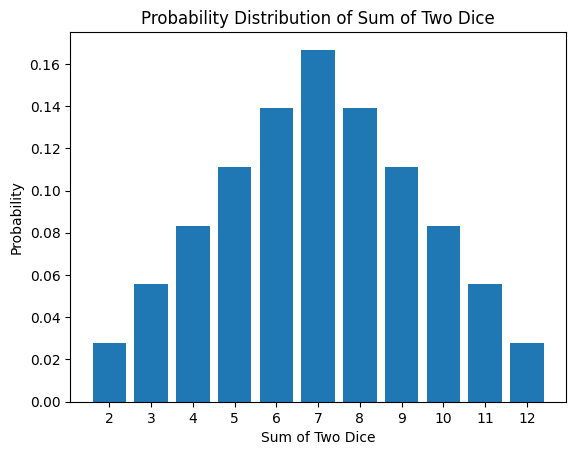

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Number of sides on a dice
num_sides = 6

# Create a sample space for the sum of two dice
sample_space = np.arange(2, 2 * num_sides + 1)

# Initialize an array to count occurrences
occurrences = np.zeros_like(sample_space)

# Count the number of occurrences for each value
for i in range(1, num_sides + 1):
    for j in range(1, num_sides + 1):
        total = i + j
        occurrences[total - 2] += 1

# Calculate frequencies
total_outcomes = num_sides**2
frequencies = occurrences / total_outcomes

# Create a bar chart
plt.bar(sample_space, frequencies, tick_label=sample_space)
plt.title("Probability Distribution of Sum of Two Dice")
plt.xlabel("Sum of Two Dice")
plt.ylabel("Probability")
plt.show()

--- 
## 3. Monte Carlo simulation (**)

This task has been done in earlier exercise, but now you should do this without any loops. Note that this has enormous performance gain compared to using loops. 

&nbsp; a) Simulate 500000 uniformly distributed points between -1 and 1, $X\sim U(-1,1)$. Now calculate the Euclidean distances between each point and the origin (0,0), $d_i = \sqrt{x_i^2 + y_i^2}$. For $d_i < 1$ plot the point with one color, and for $d_i > 1$ plot the point in another color, $i = \{1,\ldots, 500000\}$.  (**)

&nbsp; b) Calculate the fraction between number of inner points and number of outer points. What do you this will converge to when number of points reaches infinity? (**)


<details>

<summary>Hint</summary>

a) 

Read about numpy random and see if there are some useful methods to use. Also read about 

```
np.linalg.norm()
```

b)

Think in terms of theoretical areas.

</details>

<details>

<summary>Answer</summary>


a) 

<img src="../Assets/MC_simulation_500k.png" width = 300>


b) 

0.784724

No answer here, try to prove it theoretically. 


</details>

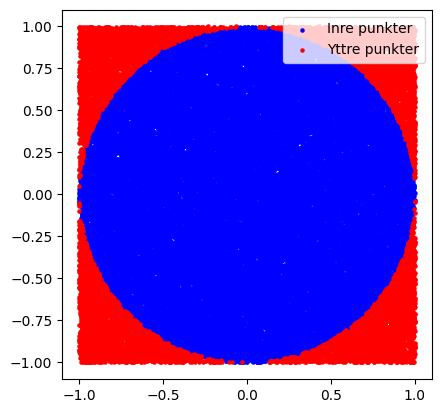

Andel inre punkter: 0.785900


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulera punkter
num_points = 50000
points = np.random.uniform(-1, 1, (num_points, 2))

# Beräkna avståndet till origo för varje punkt
distances = np.linalg.norm(points, axis=1)

# Dela upp punkter i inre och yttre baserat på avståndet
inner_points = points[distances < 1]
outer_points = points[distances >= 1]

# Plotta inre och yttre punkter
plt.scatter(inner_points[:, 0], inner_points[:, 1], color='blue', s=5, label='Inre punkter')
plt.scatter(outer_points[:, 0], outer_points[:, 1], color='red', s=5, label='Yttre punkter')

# Anpassa axlarnas skalor så att cirkeln inte blir till en ellips
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

# Beräkna andelen inre punkter
fraction = len(inner_points) / num_points
print(f"Andel inre punkter: {fraction:.6f}")

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---